# Thinkful Unit 1 Capstone - RFC
## Exploring the effect of nationality in the NHL

### The Problem:
     
Börje 'The King' Salming was one of the first European(and specifically Swedish) players in the NHL to gain fame and fight against the prevailing 'Europeans are soft'. His physicality, talent and competitive drive paved the way for future Swedish defensemen to make their mark on the NHL including 1st ballot hall of famer Niklas 'The Perfect Human' Lidstrom and the best defenseman currently playing, Erik Karlsson.
    
The Russian Five, all players from the former USSR who were brought together in the 1995-96 season by Detroit Red Wings coach Scotty Bowman and were given free reign to play 'their' game would become the most dominating line in the NHL for years.
    
Jaromír Jágr(Czech Republic) and Teemu Selänne(Finland), two of the most feared and talented power forwards of the last 30 years both require multiple pages to list the NHL records they held and awards they won.
       
Up until the late 1960's and early 1970's seasons, the NHL was almost exclusively Canadian and American born players with Canadians averaging over 90% of that population themselves. The mixing of different styles of play along with players being measurably bigger, stronger and faster with each passing year makes the NHL a more exciting sport to watch with each season.

What exactly do I mean when I speak about the 'different styles of play'? Traditionally North American hockey, and especially the Canadian style is extremely physical. While scoring goals is important, a lot of emphasis is placed on hard hits, fights, rough play in the corners and a general attempt to wear down your opponent physically in order to beat them. In contrast, Russian hockey is almost like ballet on ice. Emphasis is on fluidity and having all 5 players on a team work in unison to move the puck around the ice to create the best possible opportunities to shoot. 

When North American teams played Russian teams, the Russian teams often had less overall shots on goal but a much higher scoring rate. This was because Russian forwards would cycle the puck between them constantly and back to the defense(even leaving the zone sometime to reset entirely if necessary) in order to find a hole in the opposing teams defense and set up one of their own for a high percentage shot. Nordic countries(Sweden, Finland, Norway) tended to emphasize defensive responsibility from all players on the ice. Goals were important of course but being defensively responsible for your zone or opponent was considered the most important quality in a player. 

In [12]:
#Setting up the environment for plotting along with importing my data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('nat_totals.csv')
#a quick line of code to get the seasons better formatted
data['Season'] = data.apply(lambda x: int(str(x.Season)[:4]), axis=1)

In [13]:
#Taking a quick look at the DataFrame
data.head(10)

,Season,Nationality,Players,GP,G,A,PTS,PIM,+/-,PPG,SHG,GWG
0,1917,Canada,40,561,331,132,463,910,NaN,NaN,NaN,NaN
1,1917,United States,3,23,3,3,6,41,NaN,NaN,NaN,NaN
2,1917,United Kingdom,2,22,8,7,15,100,NaN,NaN,NaN,NaN
3,1918,Canada,34,447,213,100,313,644,NaN,NaN,NaN,NaN
4,1918,United Kingdom,1,16,7,2,9,89,NaN,NaN,NaN,NaN
5,1918,United States,1,13,2,0,2,30,NaN,NaN,NaN,NaN
6,1919,Canada,44,786,418,183,601,902,NaN,NaN,NaN,NaN
7,1919,United States,3,69,28,15,43,70,NaN,NaN,NaN,NaN
8,1919,United Kingdom,1,20,11,9,20,6,NaN,NaN,NaN,NaN
9,1920,Canada,44,783,369,150,519,878,NaN,NaN,NaN,NaN


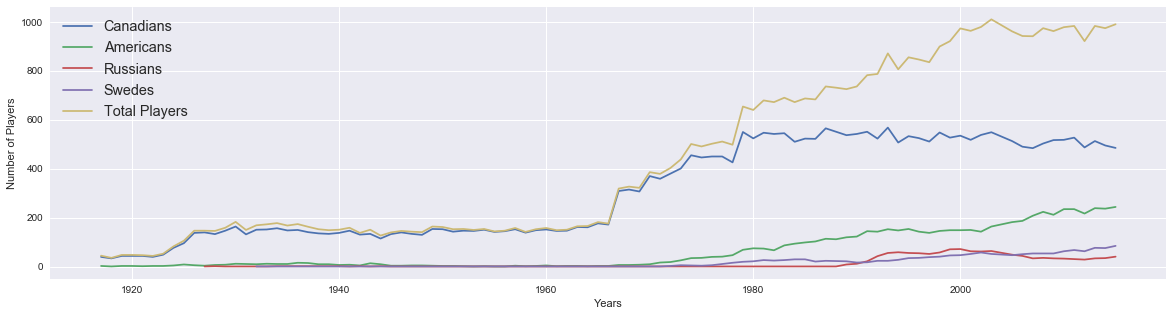

In [14]:
#Creating individual Dataframes by nationality for plotting purposes
canada_players = data[data['Nationality']=='Canada']
russia_players = data[data['Nationality'] == 'Russia']
sweden_players = data[data['Nationality'] == 'Sweden']
american_players = data[data['Nationality'] == 'United States']

#Building a line plot to visualize the relative number of the four most numerous nationalities through the years
plt.figure(figsize=(20,5))
plt.plot(canada_players.Season, canada_players.Players, label = 'Canadians')
plt.plot(american_players.Season, american_players.Players, label = 'Americans')
plt.plot(russia_players.Season, russia_players.Players, label = 'Russians')
plt.plot(sweden_players.Season, sweden_players.Players, label = 'Swedes')
plt.plot(data.Season.unique(), data.groupby('Season')['Players'].sum(), label = 'Total Players')
plt.legend(loc = 'upper left', fontsize = 'x-large')
plt.xlabel('Years')
plt.ylabel('Number of Players')
plt.show()

### The Potential Solution:

Before deciding how to go about measuring the numbers it is necessary to decide what exactly is worth measuring. In talking about if more nationalities have made the game better we need to think about what exactly makes the game 'better'. Does a higher scoring game make it better? Is it better to have less penalty minutes(the refs were not as involved in the game) or perhaps more penalty minutes(power players can be very exciting if the team on it knows how to control them)? 

Goals are important but assists are tracked as well and points(goals plus assists) are used as a good indicator of a player being a strong contributor to the team(being known as a 'point per game' player is considered very valuable). Luckily my dataset includes all of these measures as well as games played by nationality so it will be possible to calculate such metrics like points per game(by nationality).

**My hypothesis is that the addition of more nationalities to the NHL has made the game better both in terms of competitiveness as well as watchability.** 

With that in mind I believe a review of goals per player by nationality would be an interesting gauge of how the introduction of more nationalities have increased scoring(a common measure of game quality). Assists would also be worth monitoring as it can be used as a proxy for how players move the puck before a goal. But rather than measure simply if goals per player went up after more nationalities were introduced I will be looking at goals per player per nationality. In this way we can find out if all of the new Russian or Finnish players were scoring at the same clip as the Canadians. If they were putting in more goals and getting more points per player than their Canadian counterparts it stands to reason they were making the game more exciting than if they were not on the ice.

Something worth thinking about before plotting this data, however, is the fact that is is much more likely for an average Canadian player to make it to the NHL vs an average Russian or Swedish(or any other foreign born) player because of several factors ranging from the simplistic(basic proximity) to the non-quantifiable(personal connection through friends or relatives). So a look at something like goals per player by nationality or points per player by nationality, while interesting, must be taken with a grain of salt since foreign born players are always likely to be higher. This is because any foreign players coming over to play will have been the very best available from their country, aka the best of the best.

In [15]:
#I created four extra columns in the dataFrame to reflect average number of goals and average number of points per 
# player and per game
data['Goals_Per_Player'] = data['G']/data['Players']
data['Points_Per_Player'] = data['PTS']/data['Players']
data['Goals_Per_Game'] = data['G']/data['GP']
data['Points_Per_Game'] = data['PTS']/data['GP']

#Again looking at the four most numerous nationalities and an additional condition of looking at seasons after 1994
#in order to only see seasons where there were a consistent number of Swedes and Russians
canada_players = data[(data['Nationality']=='Canada') & (data['Season']>1994)]
russia_players = data[(data['Nationality'] == 'Russia')& (data['Season']>1994)]
sweden_players = data[(data['Nationality'] == 'Sweden')& (data['Season']>1994)]
american_players = data[(data['Nationality'] == 'United States')& (data['Season']>1994)]

With the data set up for plotting I first looked at goals per player and goals per game by nationality.

### Goals

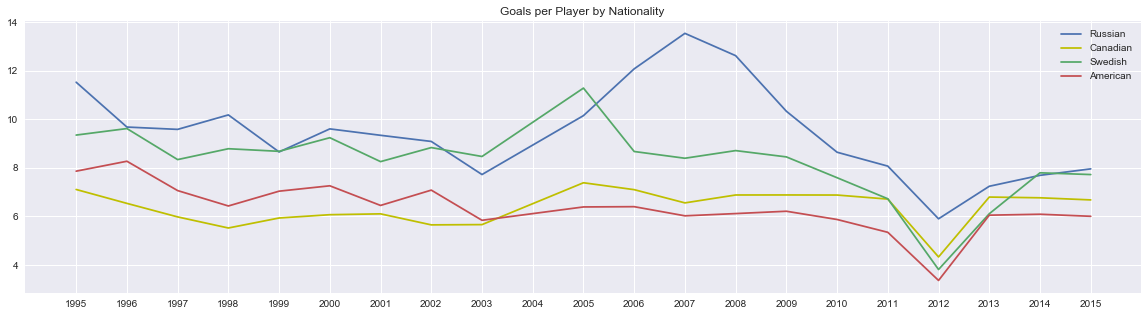

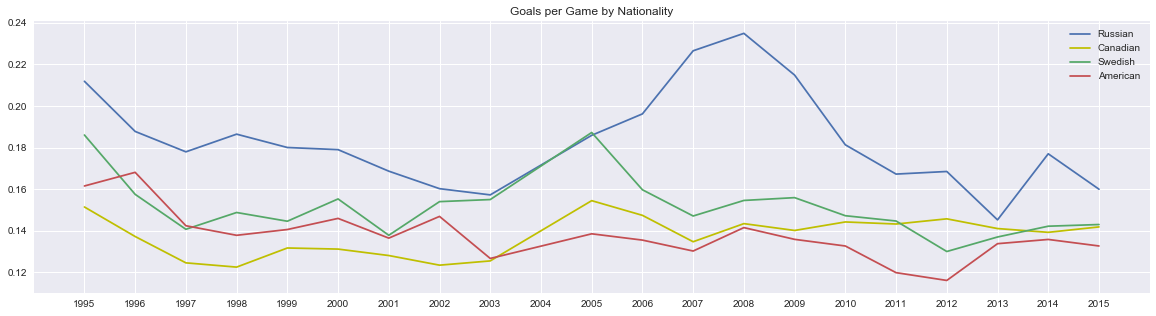

In [16]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(1995, 2016, 1))
plt.title('Goals per Player by Nationality ')
plt.plot(russia_players['Season'], russia_players['Goals_Per_Player'], label = 'Russian')
plt.plot(canada_players['Season'], canada_players['Goals_Per_Player'], label = 'Canadian', color = 'y')
plt.plot(sweden_players['Season'], sweden_players['Goals_Per_Player'], label = 'Swedish')
plt.plot(american_players['Season'], american_players['Goals_Per_Player'], label = 'American')
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.xticks(np.arange(1995, 2016, 1))
plt.title('Goals per Game by Nationality')
plt.plot(russia_players['Season'], russia_players['Goals_Per_Game'], label = 'Russian')
plt.plot(canada_players['Season'], canada_players['Goals_Per_Game'], label = 'Canadian', color = 'y')
plt.plot(sweden_players['Season'], sweden_players['Goals_Per_Game'], label = 'Swedish')
plt.plot(american_players['Season'], american_players['Goals_Per_Game'], label = 'American')
plt.legend()
plt.show()

While the top chart shows the average number of goals scored per player for an entire season by year, the bottom chart actually reflects each Nationalities contribution to the game. Unsurprisingly, Russians were the main goal scorers, edging out their 'per Game' competition by a wide margin. And while there is a noticeable downward trend in scoring overall since the mid 90's, Russian and Swedish players are consistently above their Canadian and American counterparts. As stated above, this is not completely surprising considering that only Russian and Swedish star players appear in the NHL and there are far more Canadians than all other nationalities combined meaning the average goals are dragged down by sheer number of players.

### Points

The second type of number to look at was points. Goals are a good metric but points tell a better story of how much of an impact a player had on their team since it also factors in assists. Centers(who are generally responsible for directing the attack and creating opportunities for scoring) and especially Defensemen tend to have a lot of assists from passing to a player who scores. In this way it is easier to compare forwards and defenseman who might have vastly different goal totals but similar points numbers showing that they are equally contributing to the team. That is a very simplistic explanation but it is worth noting.

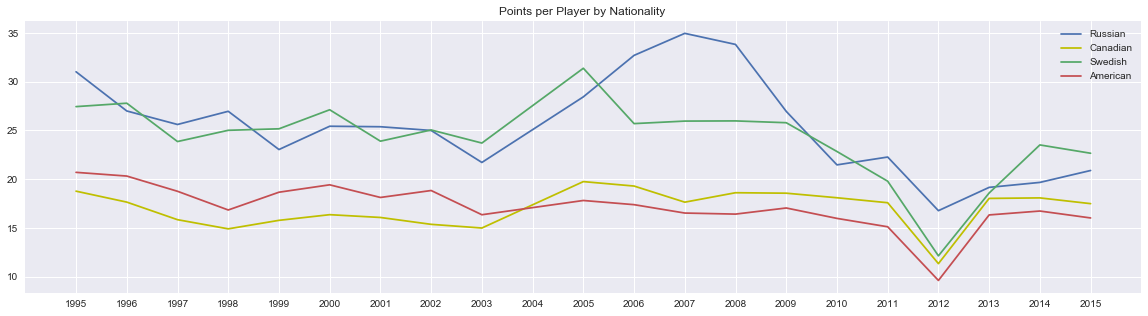

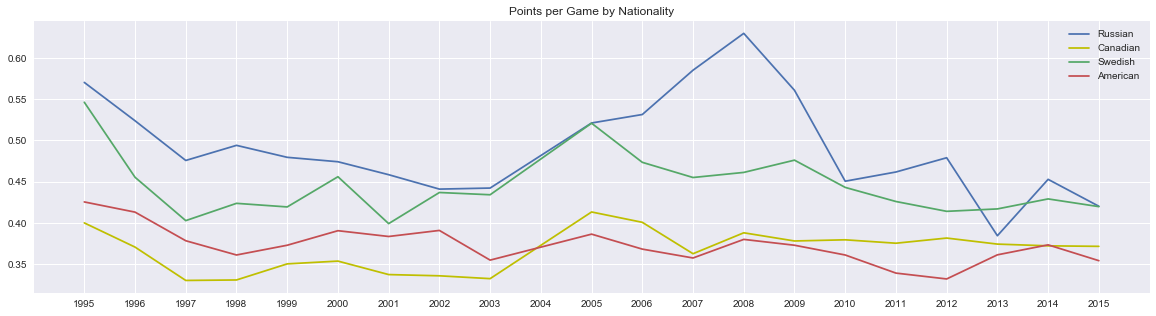

In [17]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(1995, 2016, 1))
plt.title('Points per Player by Nationality ')
plt.plot(russia_players['Season'], russia_players['Points_Per_Player'], label = 'Russian')
plt.plot(canada_players['Season'], canada_players['Points_Per_Player'], label = 'Canadian', color = 'y')
plt.plot(sweden_players['Season'], sweden_players['Points_Per_Player'], label = 'Swedish')
plt.plot(american_players['Season'], american_players['Points_Per_Player'], label = 'American')
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.xticks(np.arange(1995, 2016, 1))
plt.title('Points per Game by Nationality')
plt.plot(russia_players['Season'], russia_players['Points_Per_Game'], label = 'Russian')
plt.plot(canada_players['Season'], canada_players['Points_Per_Game'], label = 'Canadian', color = 'y')
plt.plot(sweden_players['Season'], sweden_players['Points_Per_Game'], label = 'Swedish')
plt.plot(american_players['Season'], american_players['Points_Per_Game'], label = 'American')
plt.legend()
plt.show()

While the shape of these charts is similar to the previous two(a large Russian surge in the mid aughts and a noticeable downward trend overall), it is worth pointing out that the Swedes really make their defensive presence known in the 'points per player' category. Also similar to above, both Russians and Swedes are well ahead of their North American counterparts.

## Possible additional research

Moving past some of the basic measures of success like points, it would be interesting to dive into the awards distribution during the same time period to see if non North American players started to collect their fair share of accolades like scoring titles, MVP trophies, etc. Another potential secondary metric to look at(and the data would not be nearly as robust) would be jersey sales. This stat is used as a proxy in all major sports leagues to gauge player and team popularity. Wearing jerseys, especially to your team's particular sporting event, is a relatively recent phenomenon and the data would probably not go back very far relative to the statistical player data but it would nonetheless be an interesting side piece to explore. 

## Practical Application

When thinking about a study like this, it is definitely something interesting to look at in regards to past but what application does it have on the current game? The most relevent type of experiment I could think of would be blind team comparisons. Some of the newer(and younger) GM's in hockey like John Chayka of the Phoenix Coyotes are really pushing the envelope with advanced analytics to build rosters and I think the same type of thing can be done with this concept. 


###  The Problem:

The Coyotes have been a poorly performing team for some time now for a lot of reasons. But let us suppose that the GM believes one of those reasons is that they are not as diverse as other NHL teams. Maybe no high scoring Russian wingers or responsible, stay-at-home Swedish defensemen. He wants to know if the fact that his team's mix of nationality is helping or hurting or has no discernable effect whatsoever.


### The Potential Solution:

The Coyotes hypothesis is that based on how different countries play hockey(Swedes emphasize defense, Russians are point scorers and set up men,etc), a carefully constructed mix of players from certain backgrounds will provide the team with the most well rounded product on the ice. 


### The Method for Testing the Potential Solution:

The Coyotes decide they need to start measuring some of the above metrics on teams but in order to leave out the bias of names and cities they give all teams a letter and all players a number. In this sense it is not so much an A/B test as an A/B/C/D...etc test. No more Washington Capitals, they are simply Team F with players 1, 2, 3, 4, and so on. Stats for each player and team are recorded with each player tagged to a nationality. 10 games in the Coyotes might for example see that Team C which is 50% Canadian, 20% American, 20% Russian, 8% Swedish and 2% Finnish are scoring tons of goals but are also being scored on a lot. By analyzing how the goals, points, minutes played, etc are divided amongs the various nationalities on that team and all of the others his team of data scientists can start to build a model to predict a teams success based on the country mix. Equally useful, in analyzing the country makeup of other teams they can find similar compositions to their own and using t-tests and other measure, find out if there is any difference in the performance of the Coyotes vs the other team with a similar ethnic makeup.


### Wrapping Up:

This type of experiment may seem more idealistic than practical but it could become extremely important on draft day. Often in the draft there is a clear number one choice but after that teams have a huge range of players to choose from with all different backgrounds and skillsets. Some of the most famous players of the last few decades have been taken in later rounds as an afterthought and turned into superstars. What if analysis like this could help a team decide that they need to pick up a Czech center or add an additional Finnish winger to their team. When you have something like that helping in your drafting process it makes the search for talent much more targeted.

